In [1]:
# Pour la manipulation de tableaux et Dataframes
import numpy as np
import pandas as pd

# Pour la visualisation des performances
import matplotlib.pyplot as plt
import seaborn as sns

# Pour instancier une couche Dense et modèle séquentiel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Chargement du dataset

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

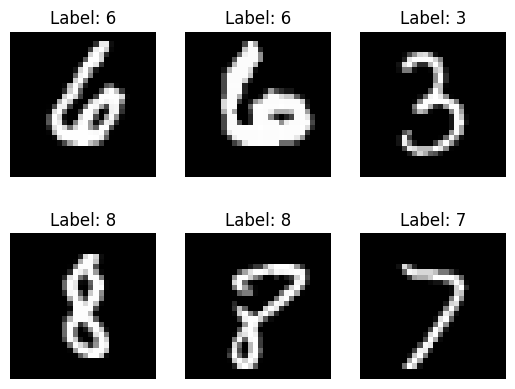

In [3]:
# Affichage de 6 images aléatoires de l'ensemble train
j = 1

for i in np.random.choice(np.arange(0, len(y_train)), size = 6):
    # Image
    img = X_train[i] 
    
    # Subplot nous permet de sélectionner une des sous-figures parmi une grille. Dans notre cas la grille
    # a 2 lignes et 3 colonnes.
    plt.subplot(2, 3, j)
    j = j + 1
    
    # Suppresion des axes
    plt.axis('off')
    
    # Affichage de la figure en niveaux de gris
    plt.imshow(img, cmap='gray', interpolation='None')

    # Modification du titre de la figure
    plt.title('Label: ' + str(y_train[i]))

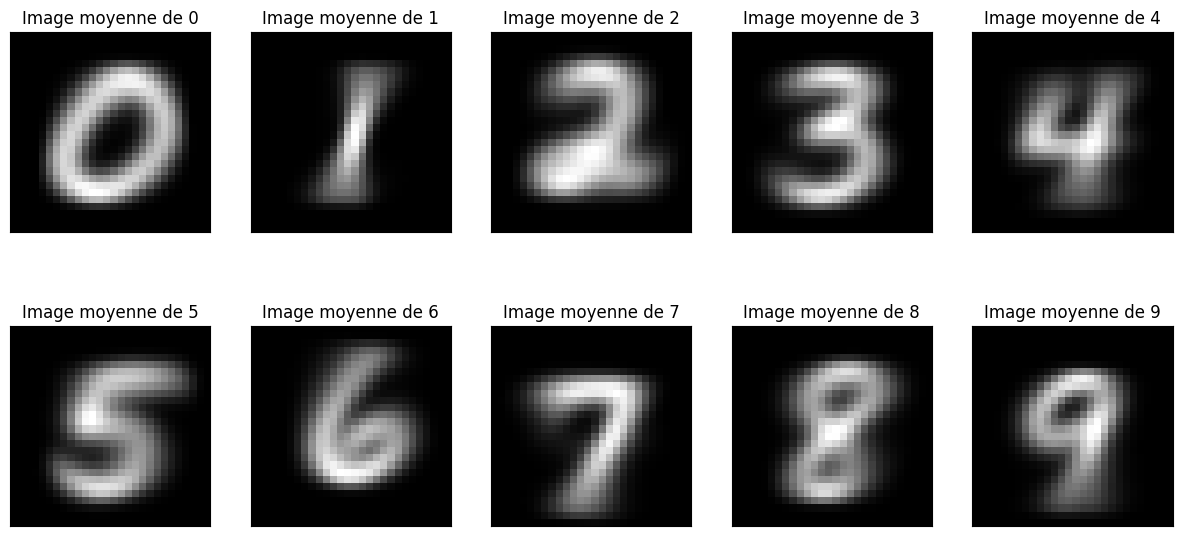

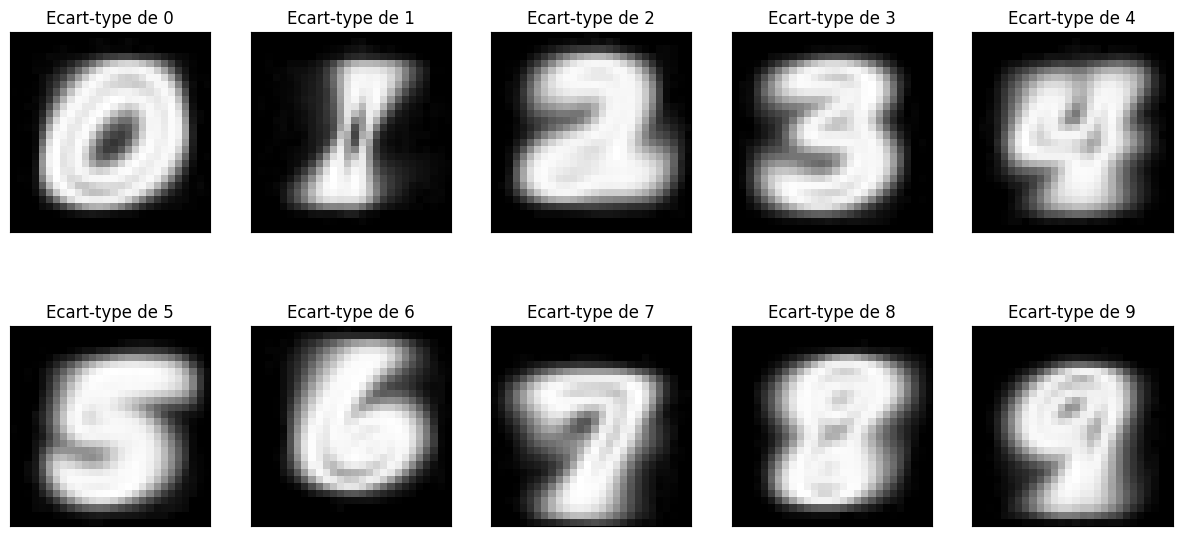

In [4]:
# Affichage pour chaque chiffre des images moyennes de l'ensemble train
plt.figure(figsize=(15,7))
num_plot=1
for i in range(10):
    plt.subplot(2,5,num_plot)
    X_train_i = X_train[y_train==i]
    X_train_i_moy = X_train_i.mean(axis=0)
    plt.imshow(X_train_i_moy,cmap='gray')
    plt.title(f"Image moyenne de {i}")
    plt.xticks([])
    plt.yticks([])
    num_plot+=1
plt.show()

# Affichage pour chaque chiffre de l'écart-type dans l'ensemble train
plt.figure(figsize=(15,7))
num_plot=1
for i in range(10):
    plt.subplot(2,5,num_plot)
    X_train_i = X_train[y_train==i]
    X_train_i_std = X_train_i.std(axis=0)
    plt.imshow(X_train_i_std,cmap='gray')
    plt.title(f"Ecart-type de {i}")
    plt.xticks([])
    plt.yticks([])
    num_plot+=1
plt.show()

### Construction du réseau de neurones

In [5]:
from tensorflow.keras.layers import Rescaling,Flatten
# Construction du réseau de neurones : modèle séquentiel de couches denses
model = Sequential()
model.add(Rescaling(1./255,input_shape=(X_train.shape[1],X_train.shape[2]))) # Normalisation de l'image
model.add(Flatten()) # Transformation en vecteur 1D
model.add(Dense(units=20, activation="relu",kernel_initializer="normal"))
model.add(Dense(units=10, activation="softmax",kernel_initializer="normal"))

d:\Sources\DS-Deep-Learning\Keras\env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# NE PAS EXECUTER

# Autre possibilité pour la construction du modèle : passer le X en vecteur 1D avant le modèle 
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])
model = Sequential()
model.add(Rescaling(1./255,input_shape=(X_train.shape[1],))) # Normalisation du vecteur 1D
model.add(Dense(units=20, activation="relu",kernel_initializer="normal"))
model.add(Dense(units=10, activation="softmax",kernel_initializer="normal"))
model.summary()

d:\Sources\DS-Deep-Learning\Keras\env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Visualisation de l'architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compilation du modèle
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [18]:
# NE PAS EXECUTER
# Autre possibilité pour les classes : utiliser du One Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Il faut alors utiliser categorical_crossentropy comme fonction de perte car on est sur des labels binaires
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

print (y_test.shape)

(10000, 10)


### Entraînement du modèle

In [8]:
# Entraînement : lots de 128 échantillons, 20 époques, 20% des échantillons pour validation
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6595 - loss: 1.3191 - val_accuracy: 0.9091 - val_loss: 0.3393
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3402 - val_accuracy: 0.9214 - val_loss: 0.2766
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9204 - loss: 0.2819 - val_accuracy: 0.9287 - val_loss: 0.2524
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9261 - loss: 0.2582 - val_accuracy: 0.9338 - val_loss: 0.2337
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9313 - loss: 0.2375 - val_accuracy: 0.9362 - val_loss: 0.2234
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9352 - loss: 0.2226 - val_accuracy: 0.9403 - val_loss: 0.2121
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9442 - loss: 0.2005 - val_accuracy: 0.9428 - val_loss: 0.2024
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9449 - loss: 0.1961 - val_accuracy: 0.

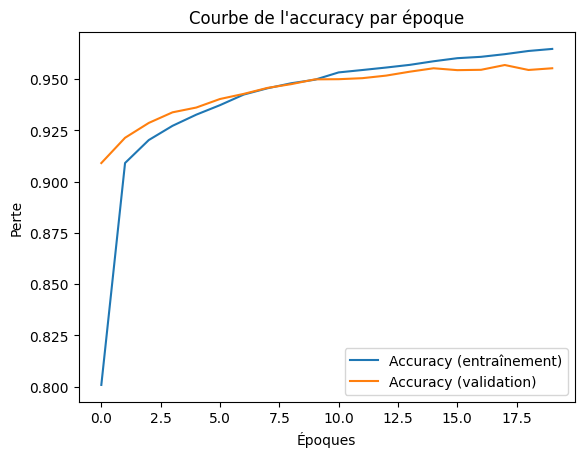

In [9]:
# Affichage de la perte par époque
plt.plot(history.history['accuracy'], label='Accuracy (entraînement)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.title('Courbe de l\'accuracy par époque')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

### Performance du modèle

In [10]:
# Evaluation
loss,accu = model.evaluate(X_test,y_test)
print("Perte test:", loss)
print("Accuracy test:", accu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.1711
Perte test: 0.1539248526096344
Accuracy test: 0.9545000195503235


In [11]:
# Prédiction : attention le modèle renvoie une proba pour chaque classe
y_pred = model.predict(X_test)
display(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step


array([[1.7398856e-06, 1.5467191e-10, 1.2240084e-04, ..., 9.8766649e-01,
        2.7980345e-06, 1.2401315e-04],
       [8.3007735e-06, 8.1322301e-04, 9.9908745e-01, ..., 1.6426254e-13,
        1.5245947e-06, 5.5213860e-14],
       [3.6539390e-05, 9.9055344e-01, 7.8191515e-04, ..., 4.2395913e-03,
        2.8489591e-03, 9.9593035e-06],
       ...,
       [3.9298186e-11, 1.4397858e-11, 1.5516315e-10, ..., 1.4598159e-05,
        3.6275582e-04, 2.9072680e-03],
       [5.2665407e-11, 1.4027050e-05, 4.8702240e-11, ..., 5.4202891e-09,
        1.1022750e-04, 2.0219066e-08],
       [4.7846147e-08, 3.9621115e-14, 7.8879577e-07, ..., 1.9289038e-13,
        3.3569889e-09, 3.9535274e-11]], dtype=float32)

In [12]:
# On récupère la classe la plus probable
y_pred = np.argmax(y_pred,axis=1)
display(y_pred)

array([7, 2, 1, ..., 4, 5, 6])

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.94      0.94      0.94      1010
           4       0.94      0.96      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.92      0.94       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



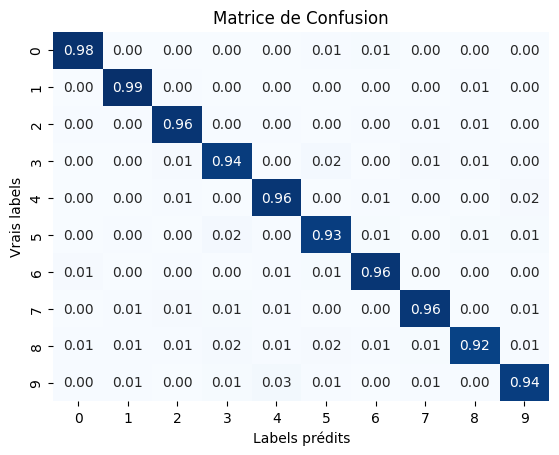

In [13]:
# Affichage matrice de confusion et rapport de classification
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
sns.heatmap(cnf_matrix, cmap='Blues', cbar=False, annot=True,fmt=".2f")
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.title("Matrice de Confusion")
plt.show()

In [14]:
# Affichage des chiffres les + confondus
import itertools
chiffres_confondus=[]
for (reel,predit) in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    if (reel != predit and cnf_matrix[reel,predit]> 0.015):
        chiffres_confondus.append((reel,predit,cnf_matrix[reel,predit]*100))
print ("Chiffres confondus :")
print (*[f"Réel : {paire[0]} - Prédit : {paire[1]} ({paire[2]:.2f} %)" for paire in chiffres_confondus],sep = '\n')

Chiffres confondus :
Réel : 3 - Prédit : 5 (2.08 %)
Réel : 4 - Prédit : 9 (1.53 %)
Réel : 5 - Prédit : 3 (2.02 %)
Réel : 8 - Prédit : 3 (1.85 %)
Réel : 8 - Prédit : 5 (1.54 %)
Réel : 9 - Prédit : 4 (2.58 %)


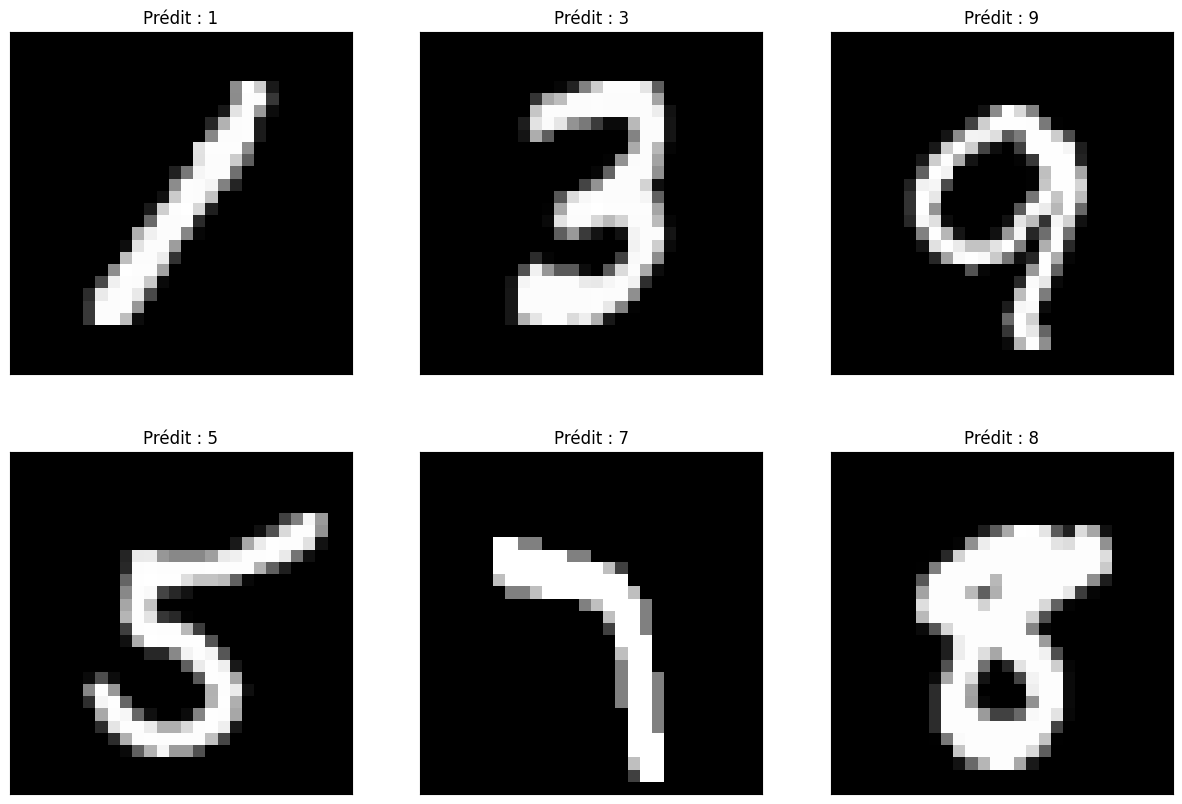

In [15]:
# Affichage aléatoire de 6 images et leur prédiction
plt.figure(figsize=(15,10))
num_plot=1
for i in np.random.choice(np.arange(0, len(y_pred)), size = 6):
    plt.subplot(2,3,num_plot)
    plt.imshow(X_test[i],cmap='gray')
    plt.title(f"Prédit : {y_pred[i]}")
    plt.xticks([])
    plt.yticks([])
    num_plot+=1
plt.show()